In [8]:
# Leer datos de los archivos
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from turtle import *

serie1 = []
serie2 = []
serie3 = []

f1 = open("SerieDeTiempoUniforme.txt", "r")
a1 = f1.read()
valores1 = a1.split(',')
for i in valores1:
    if i == "":
        serie1.append(1)
    else:
        serie1.append(int(i))
f1.close()

f2 = open("SerieDeTiempoGauss.txt", "r")
a2 = f2.read()
valores2 = a2.split(',')
for i in valores2:
    if i == "":
        serie2.append(1)
    else:
        serie2.append(float(i))
f2.close()

f3 = open("SerieDeTiempoGamma.txt", "r")
a3 = f3.read()
valores3 = a3.split(',')
for i in valores3:
    if i == "":
        serie3.append(1)
    else:
        serie3.append(float(i))
f3.close()

datos_gaussiana_tf = []
datos_gamma_tf = []
for i in serie2:
    f = int(i*125+500)
    if f>1000:
        pass
    datos_gaussiana_tf.append(f)
for i in serie3:
    f = int(i*500)
    datos_gamma_tf.append(f)

In [9]:
aleatorios = [random.randint(0,1000) for _ in range(700000)]

In [10]:
def mover(direccion,distancia,x,y,p,ancho,alto):
    pr = [0,125,250,375,500,625,750,875,1000]
    #pr = [0,200,250,450,500,700,750,950,1000]
    #pd = [0,250,500,750,1000]
    pd = [0,100,200,400,1000]
    signox = 0; signoy = 0; reb = 0; p = p; d = 0
    # Distancia a recorrer (1,2,3,4 pixeles)
    if distancia >= pd[0] and distancia < pd[1]: d = 1
    if distancia >= pd[1] and distancia < pd[2]: d = 2
    if distancia >= pd[2] and distancia < pd[3]: d = 3
    if distancia >= pd[3] and distancia < pd[4]: d = 4
    else: return x,y,reb,d
    
    # UF
    if direccion >= pr[0] and direccion < pr[1]:
        for i in range(d):
            if x > ancho/2:
                signox = 1
                reb = reb + 1
            if y > alto/2:
                signoy = 1
                reb = reb + 1
            x = x+((-1)**signox)*p*d
            y = y+((-1)**signoy)*p*d  
    # FD
    if direccion >= pr[1] and direccion < pr[2]:
        for i in range(d):
            if x > ancho/2:
                signox = 1
                reb = reb + 1
            if y < -alto/2:
                signoy = 1
                reb = reb + 1
            x = x+((-1)**signox)*p*d
            y = y-((-1)**signoy)*p*d
    # U
    if direccion >= pr[2] and direccion < pr[3]:
        for i in range(d):
            if y > alto/2:
                signoy = 1
                reb = reb + 1
            y = y+((-1)**signoy)*p*d
    # F
    if direccion >= pr[3] and direccion < pr[4]:
        for i in range(d):
            if x > ancho/2:
                signox = 1
                reb = reb + 1
            x = x+((-1)**signox)*p*d
    # B
    if direccion >= pr[4] and direccion < pr[5]:
        for i in range(d):
            if x < -ancho/2:
                signox = 1
                reb = reb + 1
            x = x-((-1)**signox)*p*d
    # D
    if direccion >= pr[5] and direccion < pr[6]:
        for i in range(d):
            if y < -alto/2:
                signoy = 1
                reb = reb + 1
            y = y-((-1)**signoy)*p*d
    # DB
    if direccion >= pr[6] and direccion < pr[7]:
        for i in range(d):
            if x < -ancho/2:
                signox = 1
                reb = reb + 1
            if y < -alto/2:
                signoy = 1
                reb = reb + 1
            x = x-((-1)**signox)*p*d
            y = y-((-1)**signoy)*p*d
    # UB
    if direccion >= pr[7] and direccion < pr[8]:
        for i in range(d):
            if x < -ancho/2:
                signox = 1
                reb = reb + 1
            if y > alto/2:
                signoy = 1
                reb = reb + 1
            x = x-((-1)**signox)*p*d
            y = y+((-1)**signoy)*p*d
            
    return x,y,reb,p*d

In [11]:
def dibujar(rebotes,ancho,alto,p,k,serie):
    #setup(ancho, alto, 0, 0)
    #screensize(3000, 3000)
    
    # Condiciones iniciales
    x0 = int(serie[0]/10)
    y0 = int(serie[1]/10)
    xp = [x0]
    yp = [y0]
    area_cubierta = set([(x0, y0)])  # Añade posición inicial
    areas_por_paso = [1]
    dist_rec = 0
    #penup()
    #goto(x0, y0)
    #pendown()
    for i in range(k):
        dire = serie[2*i]
        dist = serie[2*i+1]
        x,y,re,d = mover(dire,dist,x0,y0,p,ancho,alto)
        dist_rec = dist_rec + d
        rebotes = rebotes + re
        #pensize(3*p)
        #pencolor(0.1, 0.5, 1)
        #goto(x, y)
        x0 = x
        y0 = y
        xp.append(x)
        yp.append(y)
        area_cubierta.add((x, y))  # Registra nueva posición
        areas_por_paso.append(len(area_cubierta))  # Actualiza el área cubierta
    fig, ax = plt.subplots(figsize=(10, 11))
    plt.title('Movimiento Browniano.')
    #plt.grid(True)
    ax.plot(xp, yp)
    fig, ax2 = plt.subplots(figsize=(10, 11))
    plt.title('Evolucion del area ocupada.')
    plt.grid(True)
    ax2.plot(areas_por_paso)
    #exitonclick()
    return rebotes,dist_rec

In [17]:
def dibujar2(rebotes,ancho,alto,p,k,serie):
    setup(ancho, alto, 0, 0)
    screensize(3000, 3000)
    
    # Condiciones iniciales
    x0 = int(serie[0]/10)
    y0 = int(serie[1]/10)
    xp = [x0]
    yp = [y0]
    area_cubierta = set([(x0, y0)])  # Añade posición inicial
    areas_por_paso = [1]
    dist_rec = 0
    penup()
    goto(x0, y0)
    pendown()
    for i in range(k):
        dire = serie[2*i]
        dist = serie[2*i+1]
        x,y,re,d = mover(dire,dist,x0,y0,p,ancho,alto)
        dist_rec = dist_rec + d
        rebotes = rebotes + re
        pensize(3*p)
        pencolor(0.1, 0.5, 1)
        goto(x, y)
        x0 = x
        y0 = y
        xp.append(x)
        yp.append(y)
        area_cubierta.add((x, y))  # Registra nueva posición
        areas_por_paso.append(len(area_cubierta))  # Actualiza el área cubierta
    exitonclick()
    return rebotes,dist_rec

74 16502


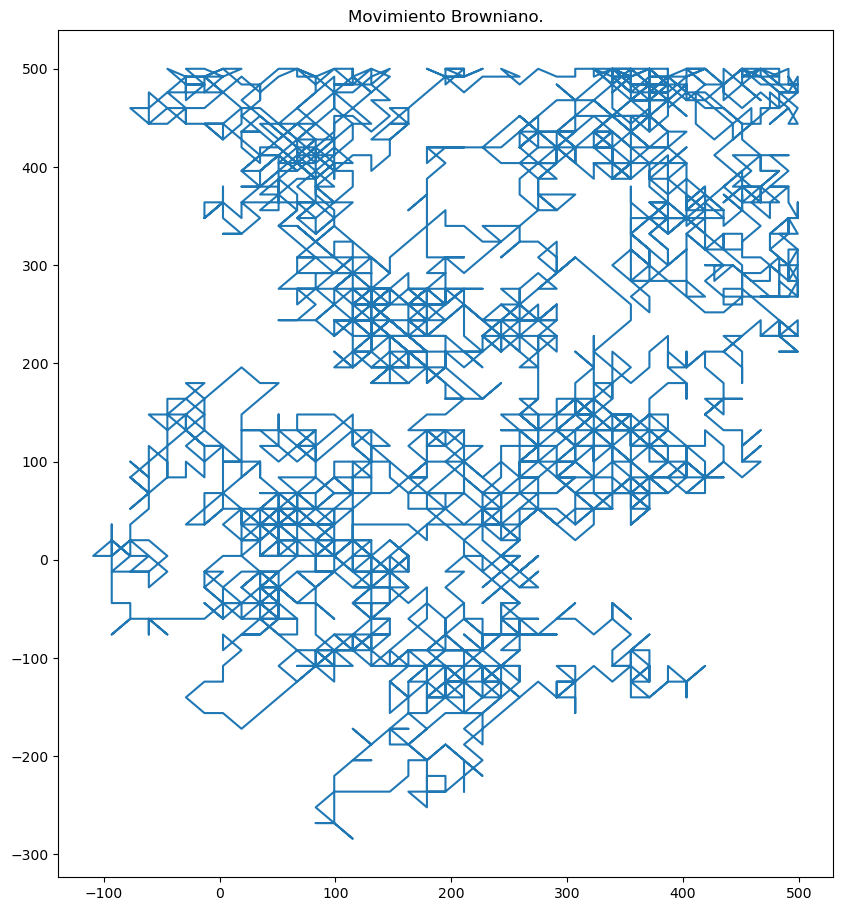

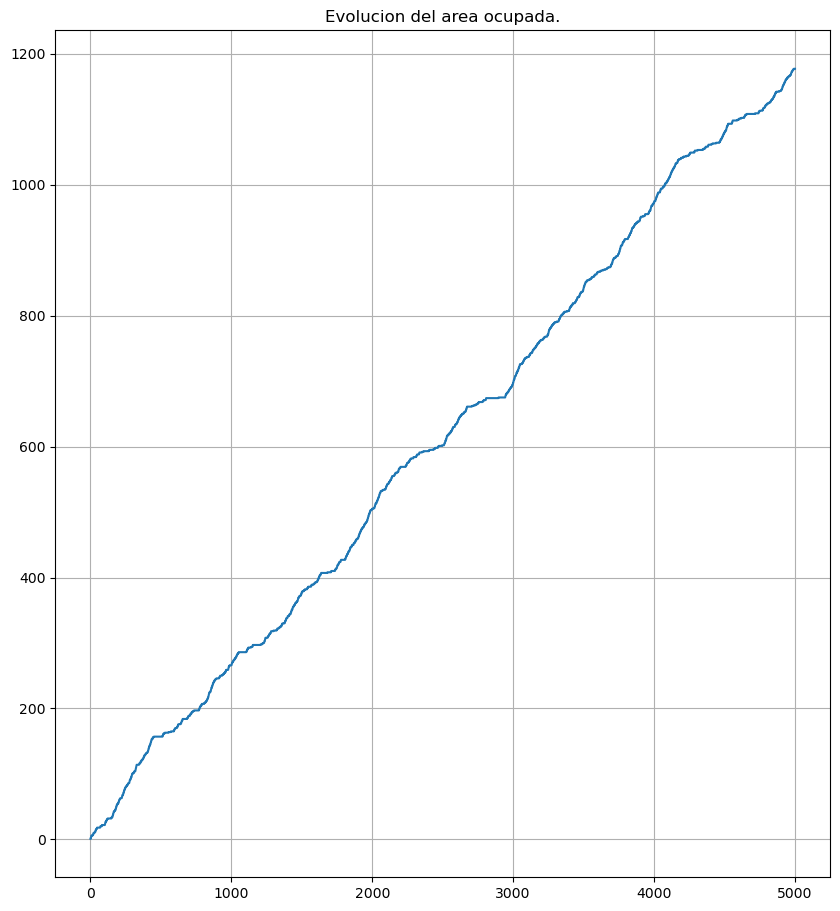

In [13]:
rebotes = 0
# Tamaño de la imagen
ancho = 1000
alto = 1000
k = 5000
# Tamaño del pixel
p = 1
rebotes,dist_rec = dibujar(rebotes,ancho,alto,p,k,serie1)
print(rebotes,dist_rec)

110 15068


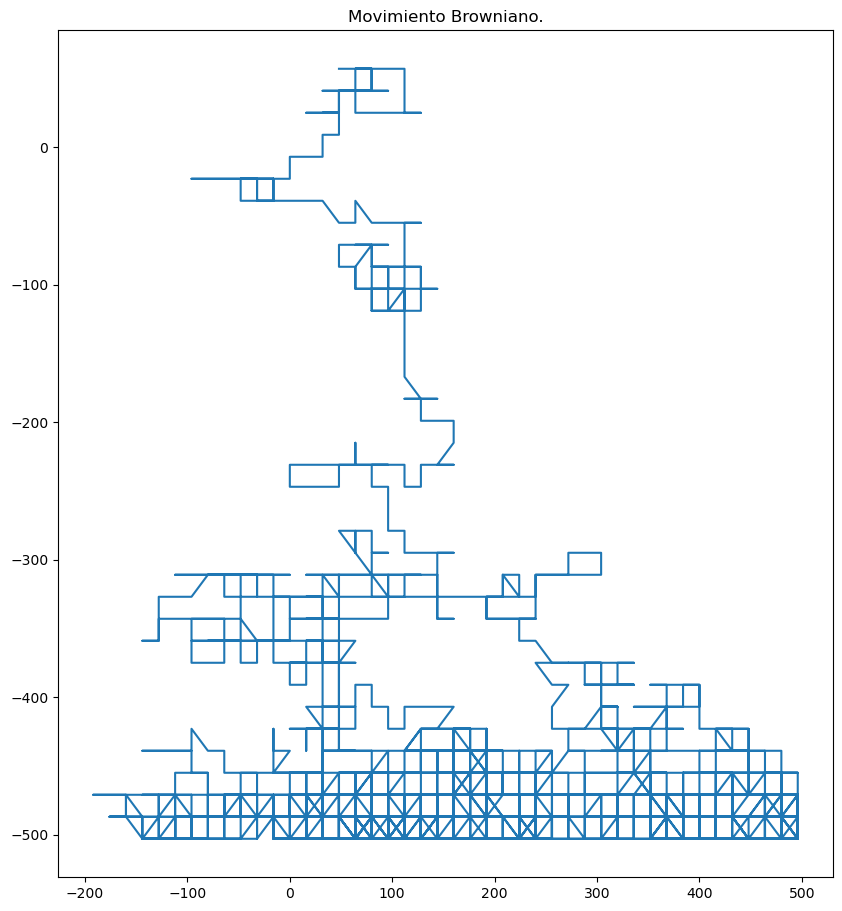

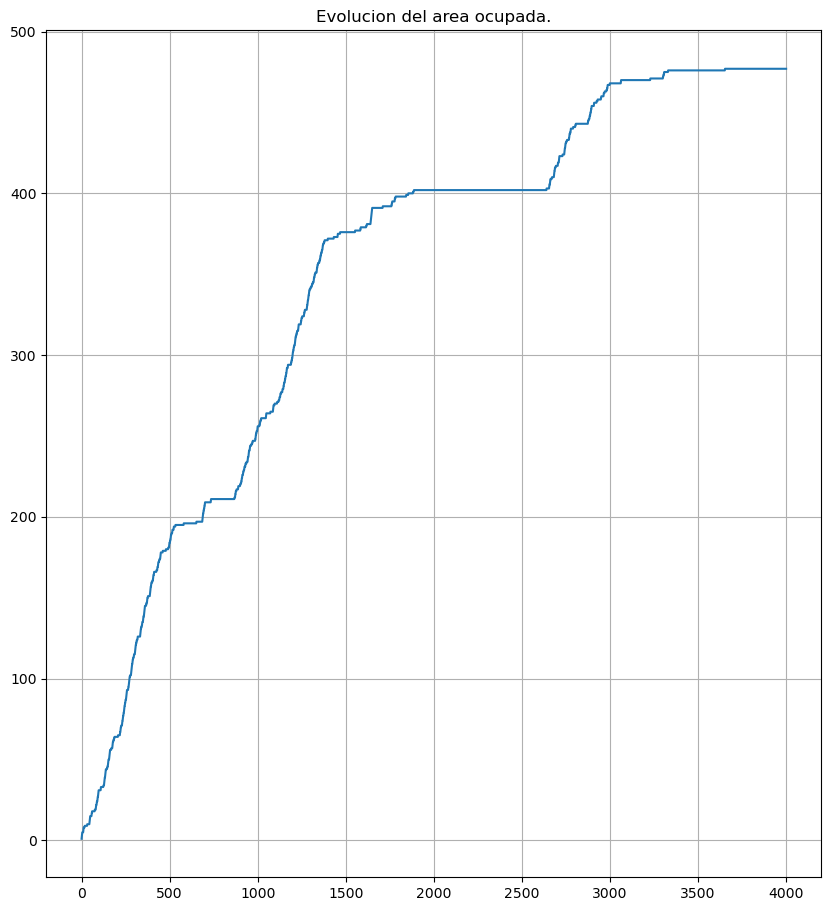

In [14]:
rebotes = 0
# Tamaño de la imagen
ancho = 1000
alto = 1000
k = 4000
# Tamaño del pixel
p = 1
rebotes,dist_rec = dibujar(rebotes,ancho,alto,p,k,datos_gaussiana_tf)
print(rebotes,dist_rec)

681 11311


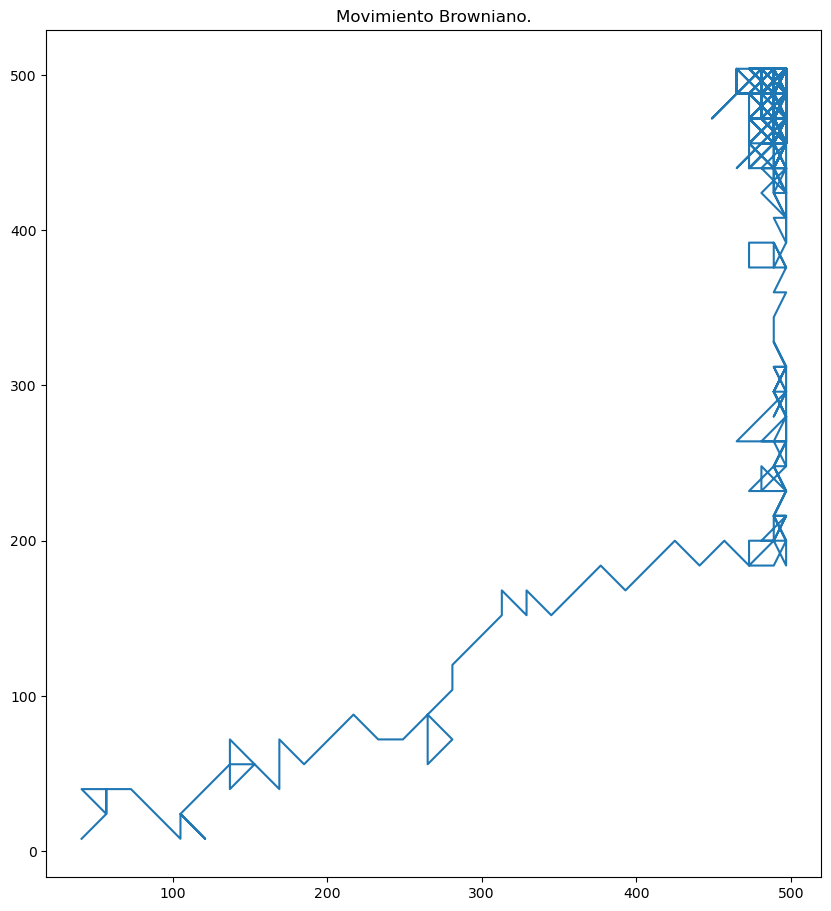

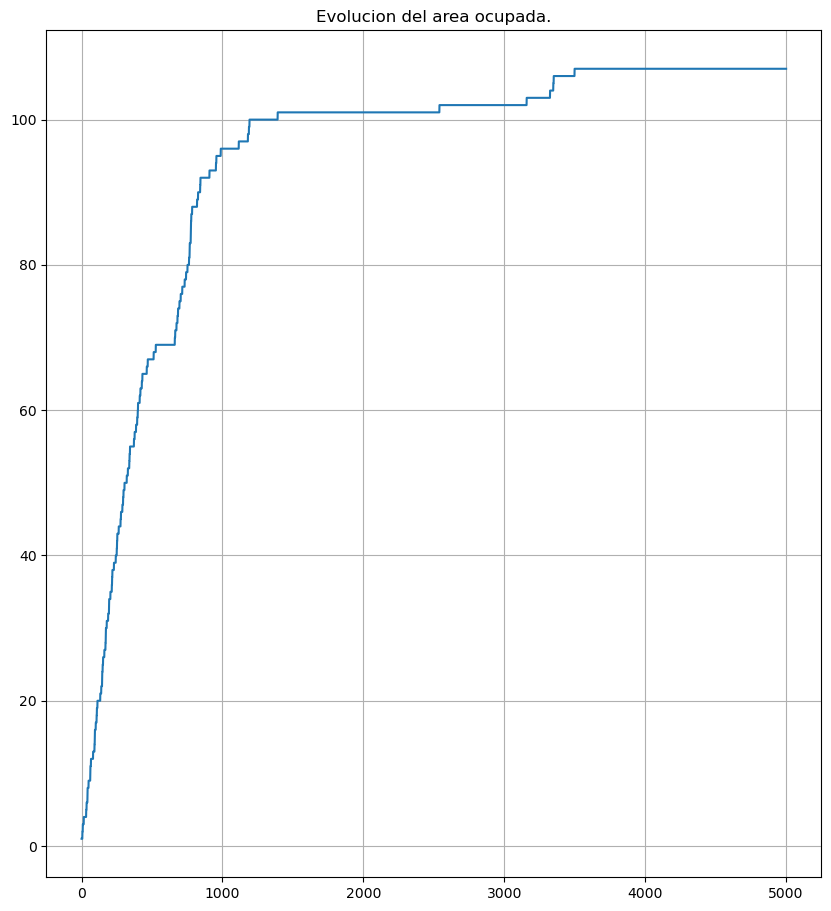

In [15]:
rebotes = 0
# Tamaño de la imagen
ancho = 1000
alto = 1000
k = 5000
# Tamaño del pixel
p = 1
rebotes,dist_rec = dibujar(rebotes,ancho,alto,p,k,datos_gamma_tf)
print(rebotes,dist_rec)

4003 1153230


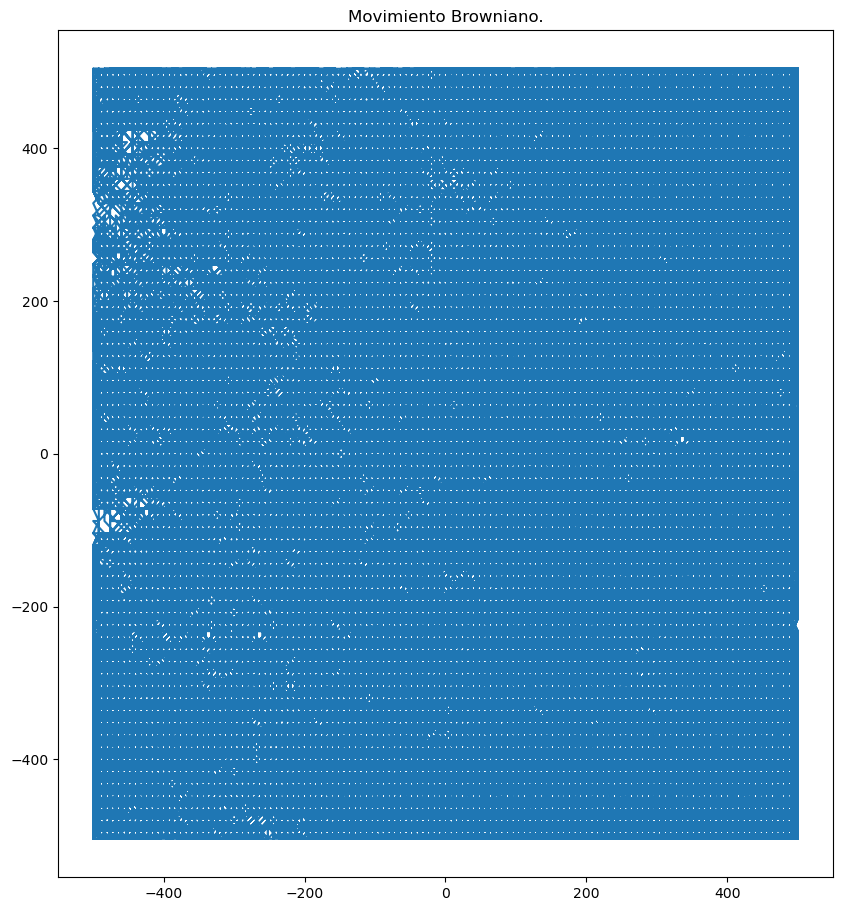

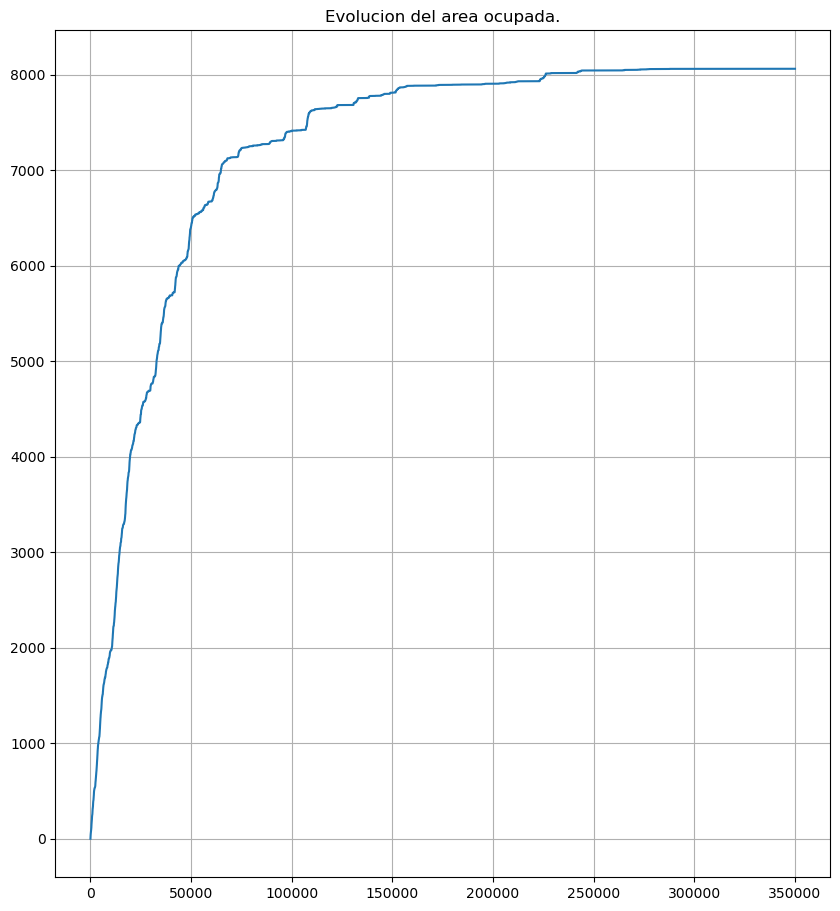

In [16]:
rebotes = 0
# Tamaño de la imagen
ancho = 1000
alto = 1000
k = 350000
# Tamaño del pixel
p = 1
rebotes,dist_rec = dibujar(rebotes,ancho,alto,p,k,aleatorios)
print(rebotes,dist_rec)

In [19]:
# Simulacion
rebotes = 0
# Tamaño de la imagen
ancho = 1000
alto = 1000
k = 4000
# Tamaño del pixel
p = 1
rebotes,dist_rec = dibujar2(rebotes,ancho,alto,p,k,serie1)